In [1]:
pip install keras==2.15.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --user tensorflow-intel

Note: you may need to restart the kernel to use updated packages.


In [4]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
from IPython.display import SVG

In [5]:
import numpy as np

In [ ]:
pip install livelossplot

In [6]:
import livelossplot as llp
plot_losses = llp.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLUMNS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [7]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape: ', X_train.shape)
    print('Train labels shape: ', y_train.shape)
    print('Test images shape: ', X_test.shape)
    print('Test labels shape: ', y_train.shape)
    print('Train labels: ', y_train)
    print('Test labels: ', y_test)

In [8]:
# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Chech state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28)
Test labels shape:  (60000,)
Train labels:  [5 0 4 ... 5 6 8]
Test labels:  [7 2 1 ... 4 5 6]


In [9]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS*NUM_COLUMNS))
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS*NUM_COLUMNS))
X_test = X_test.astype('float32')/255

In [10]:
# Categorically encode labels (On-hot-encoding)
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [11]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape:  (60000, 784)
Train labels shape:  (60000, 10)
Test images shape:  (10000, 784)
Test labels shape:  (60000, 10)
Train labels:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Build a Neural Network
model = models.Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (NUM_ROWS*NUM_COLUMNS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

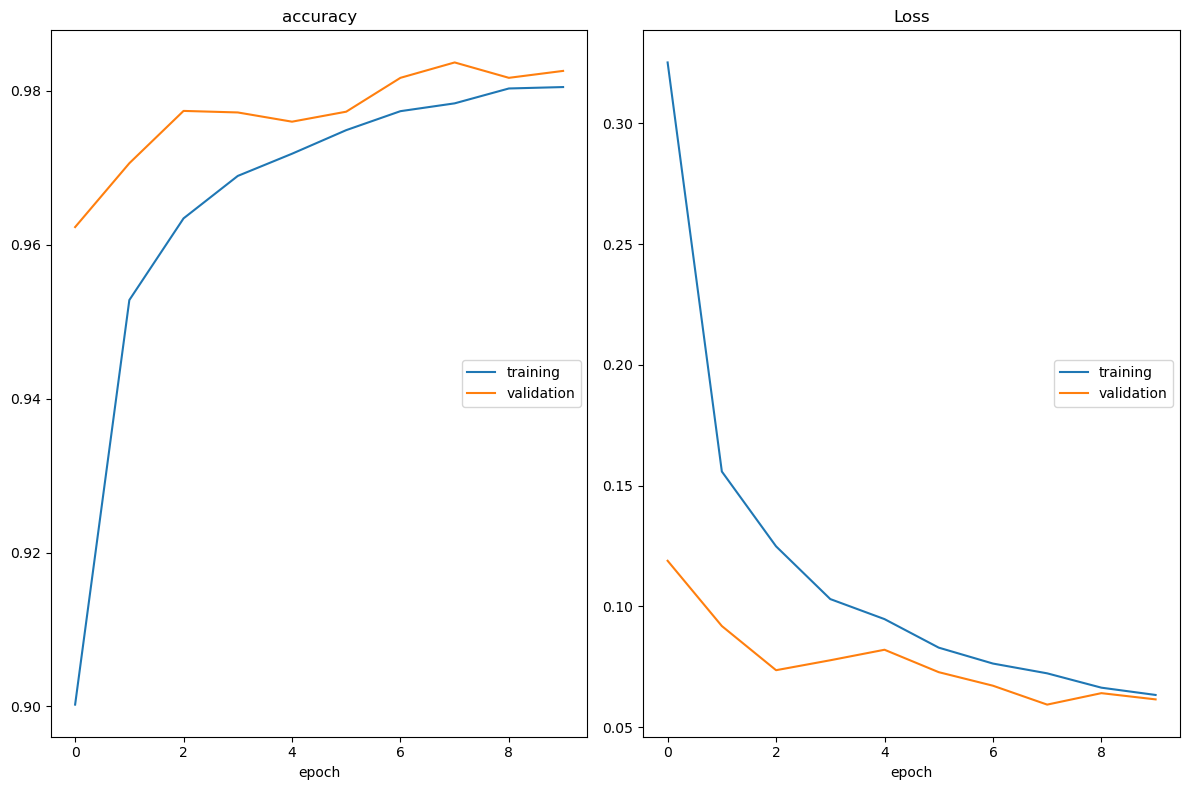

accuracy
	training         	 (min:    0.900, max:    0.980, cur:    0.980)
	validation       	 (min:    0.962, max:    0.984, cur:    0.983)
Loss
	training         	 (min:    0.063, max:    0.325, cur:    0.063)
	validation       	 (min:    0.059, max:    0.119, cur:    0.061)
469/469 [==============================] - 8s 18ms/step - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.0615 - val_accuracy: 0.9826
Test loss:  0.06149251013994217
Test accuracy:  0.9825999736785889


In [13]:
# Compile model (fine tuning)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, callbacks = [plot_losses], verbose = 1,
          validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pip install pydot

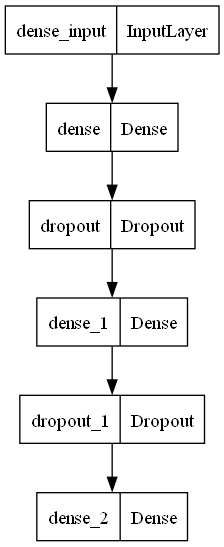

In [15]:
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
# Plot the model
plot_model(model)